Loading data

In [1]:
import pandas as pd
import numpy as np

file_dataset = '../data/raw/cryptocurrencypricehistory/ethereum_dataset.csv'

dateparser = lambda d : pd.to_datetime(d, format="%m/%d/%Y")
dataset = pd.read_csv(file_dataset,
                     index_col=0,
                     parse_dates=True,
                     date_parser=dateparser)

We view that data has not nulls in eth_chaindatasize and eth_ens_register columns.
eth_chaindatasize column no have any data. We remove it.
Statistical Data

In [2]:
print(dataset.isnull().sum())
dataset.drop(['eth_chaindatasize'],axis=1, inplace=True)
dataset.describe()

UnixTimeStamp          0
eth_etherprice         0
eth_tx                 0
eth_address            0
eth_supply             0
eth_marketcap          0
eth_hashrate           0
eth_difficulty         0
eth_blocks             0
eth_uncles             0
eth_blocksize          0
eth_blocktime          0
eth_gasprice           0
eth_gaslimit           0
eth_gasused            0
eth_ethersupply        0
eth_chaindatasize    769
eth_ens_register     644
dtype: int64


,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
count,7.690000e+02,769.000000,769.000000,7.690000e+02,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,7.690000e+02,7.690000e+02,7.690000e+02,769.000000,125.000000
mean,1.471392e+09,46.920806,70564.308192,1.050655e+06,8.320820e+07,4301.621649,13247.782131,233.619406,5517.196359,429.973992,2770.429129,15.707763,3.922550e+10,3.993699e+06,3.129846e+09,29182.658891,1301.024000
std,1.919250e+07,90.378356,89424.024060,1.521229e+06,6.753548e+06,8451.186405,22419.039496,455.312190,627.739112,160.668231,3457.027985,2.158544,5.545561e+10,1.285138e+06,4.580532e+09,3352.671936,839.253129
min,1.438214e+09,0.000000,0.000000,9.205000e+03,7.204931e+07,0.000000,23.756900,0.121000,3383.000000,126.000000,575.000000,4.460000,0.000000e+00,0.000000e+00,0.000000e+00,17380.937500,0.000000
25%,1.454803e+09,2.520000,17549.000000,5.892500e+04,7.715399e+07,193.763321,672.601500,11.176000,5046.000000,351.000000,1200.000000,14.160000,2.264193e+10,3.141700e+06,6.648190e+08,26694.531250,581.000000
50%,1.471392e+09,10.970000,42346.000000,5.394280e+05,8.308015e+07,921.391838,4362.965300,60.393000,5861.000000,403.000000,1531.000000,14.670000,2.394373e+10,4.012114e+06,1.362771e+09,30819.843750,1267.000000
75%,1.487981e+09,14.990000,58756.000000,1.081093e+06,8.922728e+07,1248.461400,10123.880000,142.922000,6035.000000,464.000000,2045.000000,16.890000,5.231352e+10,4.711458e+06,2.573096e+09,31808.593750,1971.000000
max,1.504570e+09,394.660000,444413.000000,7.067860e+06,9.445146e+07,36641.699754,95055.985800,2250.289000,6912.000000,2044.000000,19760.000000,25.530000,9.395883e+11,6.722669e+06,2.325272e+10,39316.093750,3863.000000


Cleaning UnixTimeStamp
timestamp matches with Date(UTC) and no has duplicates.
We make a serie to verify if no have any jump on dates and all is correct.

In [3]:

dataset['date_idx'] = dataset.index
dataset['date'] = dataset.apply( lambda row: pd.to_datetime(row['UnixTimeStamp'], unit='s'), axis=1)
dataset['datesMatch'] = (dataset['date']==dataset['date_idx'])
print(dataset['datesMatch'].describe())
dataset['datesSerie'] = pd.bdate_range(dataset.index.min(), periods=dataset['UnixTimeStamp'].count(), freq='D')
dataset['datesMatch'] = (dataset['date_idx']==dataset['datesSerie'])
print(dataset['datesMatch'].describe())
dataset.drop(['date_idx','date','datesMatch','datesSerie'],axis=1, inplace=True)



count      769
unique       1
top       True
freq       769
Name: datesMatch, dtype: object
count      769
unique       1
top       True
freq       769
Name: datesMatch, dtype: object


Cleaning eth_etherprice.
It has lost some data, we try to get from Close column of prices file.

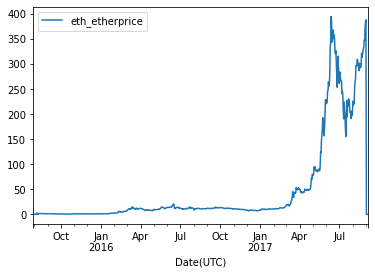

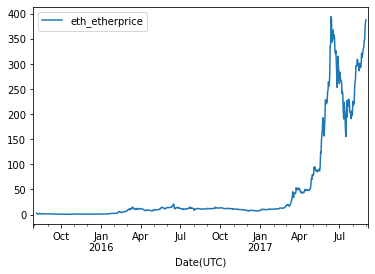

In [4]:
dataset.plot(y='eth_etherprice')
dataset['eth_etherprice'] = dataset.apply( lambda row: row['eth_etherprice'] if (row['eth_etherprice']>0 ) else np.nan, axis=1)

file_price = '../data/raw/cryptocurrencypricehistory/ethereum_price.csv'
price = pd.read_csv(file_price,
            index_col=0,
            na_values='-',
            parse_dates=True)
join  = dataset.join(price['Close'])
join['eth_etherprice'] = join.apply( lambda row: row['eth_etherprice'] if (not pd.isna(row['eth_etherprice']) or pd.isnull(row['Close'])) else row['Close'], axis=1)


dataset.plot(y='eth_etherprice')


Cleaning eth_tx.
Apparently there is no wrong data

count       769.000000
mean      70564.308192
std       89424.024060
min           0.000000
25%       17549.000000
50%       42346.000000
75%       58756.000000
max      444413.000000
Name: eth_tx, dtype: float64


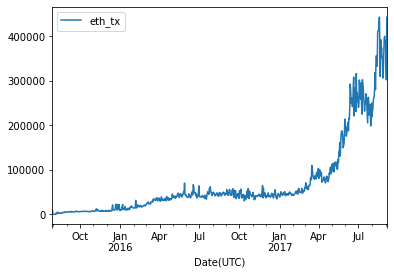

In [5]:
print(dataset['eth_tx'].describe())
dataset.plot(y='eth_tx')

Cleaning eth_address. 
Apparently there is no wrong data

count    7.690000e+02
mean     1.050655e+06
std      1.521229e+06
min      9.205000e+03
25%      5.892500e+04
50%      5.394280e+05
75%      1.081093e+06
max      7.067860e+06
Name: eth_address, dtype: float64


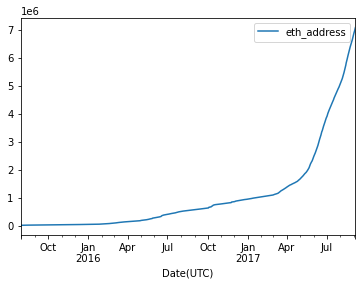

In [6]:
print(dataset['eth_address'].describe())
dataset.plot(y='eth_address')


Cleaning eth_supply. 
Apparently there is no wrong data

count    7.690000e+02
mean     8.320820e+07
std      6.753548e+06
min      7.204931e+07
25%      7.715399e+07
50%      8.308015e+07
75%      8.922728e+07
max      9.445146e+07
Name: eth_supply, dtype: float64


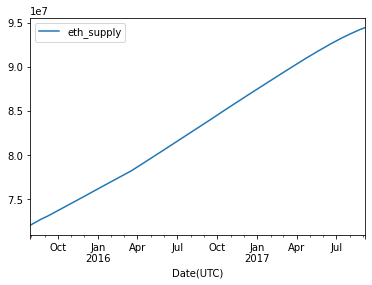

In [7]:
print(dataset['eth_supply'].describe())
dataset.plot(y='eth_supply')


Cleaning eth_marketcap.
This has some data lost we clean mark as na.. We could get data from other file.

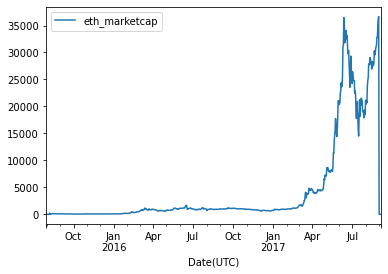

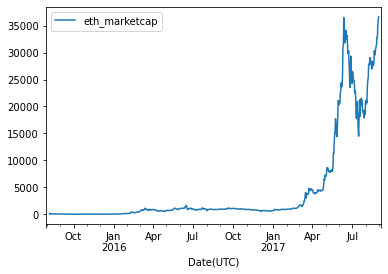

In [8]:
dataset.plot(y='eth_marketcap')
dataset['eth_marketcap'] = dataset.apply( lambda row: row['eth_marketcap'] if (row['eth_marketcap']>0 ) else np.nan, axis=1)
dataset.plot(y='eth_marketcap')



Cleaning eth_hashrate. 
Apparently there is no wrong data

count      769.000000
mean     13247.782131
std      22419.039496
min         23.756900
25%        672.601500
50%       4362.965300
75%      10123.880000
max      95055.985800
Name: eth_hashrate, dtype: float64


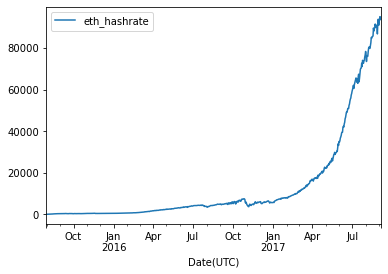

In [9]:
print(dataset['eth_hashrate'].describe())
dataset.plot(y='eth_hashrate')

Cleaning eth_difficulty. 
Apparently there is no wrong data

count     769.000000
mean      233.619406
std       455.312190
min         0.121000
25%        11.176000
50%        60.393000
75%       142.922000
max      2250.289000
Name: eth_difficulty, dtype: float64


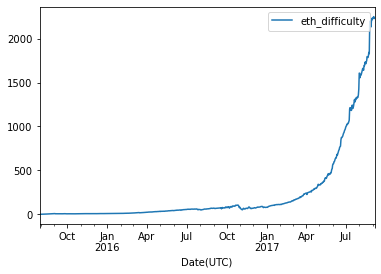

In [10]:
print(dataset['eth_difficulty'].describe())
dataset.plot(y='eth_difficulty')

Cleaning eth_blocks.
It seams that in april has a change of any cause that increases value from ~5000 to ~6000. It must be asked why.

count     769.000000
mean     5517.196359
std       627.739112
min      3383.000000
25%      5046.000000
50%      5861.000000
75%      6035.000000
max      6912.000000
Name: eth_blocks, dtype: float64


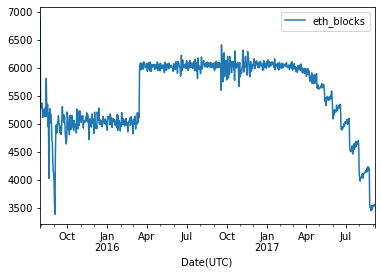

In [11]:
print(dataset['eth_blocks'].describe())
dataset.plot(y='eth_blocks')

Cleaning eth_uncles
I can't be sure but if it is upper 800 isn't on the mean and these I cleaned.

count     769.000000
mean      429.973992
std       160.668231
min       126.000000
25%       351.000000
50%       403.000000
75%       464.000000
max      2044.000000
Name: eth_uncles, dtype: float64


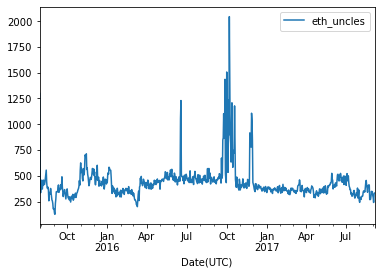

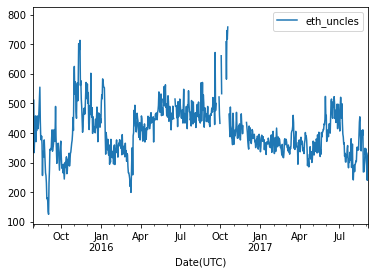

In [12]:
print(dataset['eth_uncles'].describe())
dataset.plot(y='eth_uncles')
dataset['eth_uncles'] = dataset.apply( lambda row: row['eth_uncles'] if (row['eth_uncles']<800 ) else np.nan, axis=1)
dataset.plot(y='eth_uncles')

Cleaning eth_blocksize.
Exceptional block size on eth_blocksize doesn't seams correct.
Discarting if differences are over 5000.

count      769.000000
mean      2770.429129
std       3457.027985
min        575.000000
25%       1200.000000
50%       1531.000000
75%       2045.000000
max      19760.000000
Name: eth_blocksize, dtype: float64


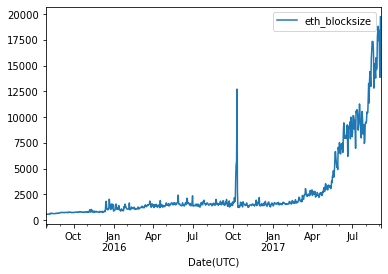

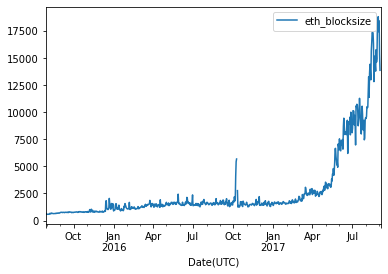

In [13]:
print(dataset['eth_blocksize'].describe())
dataset.plot(y='eth_blocksize')

oldv = np.nan
def applyfun (row):
    global oldv
    actv = row['eth_blocksize']
    if pd.isna(oldv):
        oldv = actv
    diff = abs(oldv - actv)
    if diff < 5000:
        oldv = actv
        return actv
    else:
        return np.nan

dataset['eth_blocksize'] = dataset.apply(applyfun, axis=1)
dataset.plot(y='eth_blocksize')

Cleaning eth_blocktime.

This values could be comparet with eth_blocks. Graphics are very similar but inversed.
I can't say this has any problem.

count    769.000000
mean      15.707763
std        2.158544
min        4.460000
25%       14.160000
50%       14.670000
75%       16.890000
max       25.530000
Name: eth_blocktime, dtype: float64


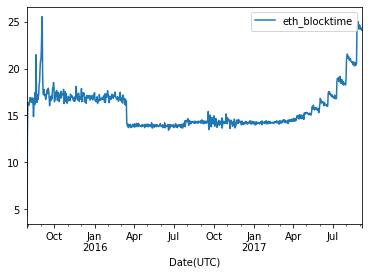

In [14]:
print(dataset['eth_blocktime'].describe())
dataset.plot(y='eth_blocktime')

Cleaning eth_gasprice
As stadistical data and graphical view shors that prices upper 1.0e11 and 0 are incorrect.

count    7.690000e+02
mean     3.922550e+10
std      5.545561e+10
min      0.000000e+00
25%      2.264193e+10
50%      2.394373e+10
75%      5.231352e+10
max      9.395883e+11
Name: eth_gasprice, dtype: float64


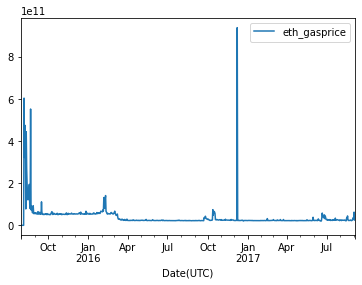

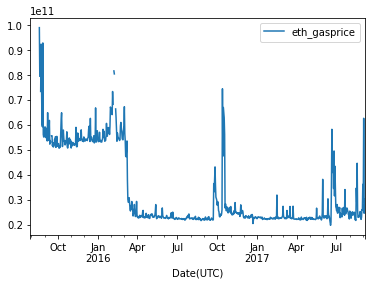

In [15]:
print(dataset['eth_gasprice'].describe())
dataset.plot(y='eth_gasprice')
dataset['eth_gasprice'] = dataset.apply( lambda row: row['eth_gasprice'] if (row['eth_gasprice']<1.0e11 and row['eth_gasprice']>0) else np.nan, axis=1)
dataset.plot(y='eth_gasprice')


Cleaning eth_gaslimit.
It's a strage chart. But i can't get something that I can think be incorrect.


count    7.690000e+02
mean     3.993699e+06
std      1.285138e+06
min      0.000000e+00
25%      3.141700e+06
50%      4.012114e+06
75%      4.711458e+06
max      6.722669e+06
Name: eth_gaslimit, dtype: float64


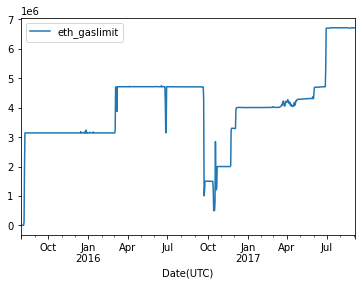

In [16]:
print(dataset['eth_gaslimit'].describe())
dataset.plot(y='eth_gaslimit')

Cleaning eth_gasused
Apparently there is no wrong data

count    7.690000e+02
mean     3.129846e+09
std      4.580532e+09
min      0.000000e+00
25%      6.648190e+08
50%      1.362771e+09
75%      2.573096e+09
max      2.325272e+10
Name: eth_gasused, dtype: float64


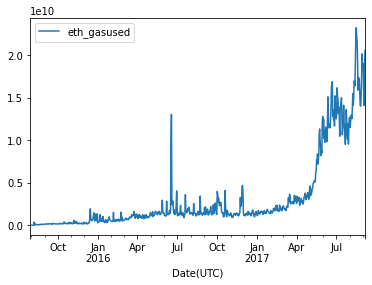

In [17]:
print(dataset['eth_gasused'].describe())
dataset.plot(y='eth_gasused')

Cleaning eth_ethersupply
Apparently there is no wrong data
Suspicius. That this chart is similar with blocktime but at inverse.

count      769.000000
mean     29182.658891
std       3352.671936
min      17380.937500
25%      26694.531250
50%      30819.843750
75%      31808.593750
max      39316.093750
Name: eth_ethersupply, dtype: float64


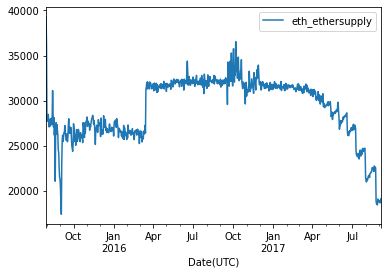

In [18]:
print(dataset['eth_ethersupply'].describe())
dataset.plot(y='eth_ethersupply')

Cleaning eth_ens_register.
It has startd to register data so later. 
Apparently there is no wrong data

count     125.000000
mean     1301.024000
std       839.253129
min         0.000000
25%       581.000000
50%      1267.000000
75%      1971.000000
max      3863.000000
Name: eth_ens_register, dtype: float64


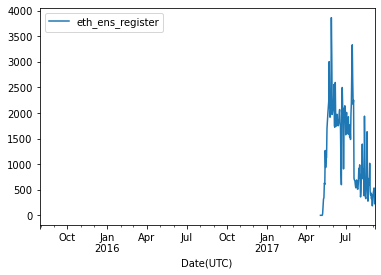

In [19]:
print(dataset['eth_ens_register'].describe())
dataset.plot(y='eth_ens_register')

Saving results file.

In [20]:
dataset.to_csv('../data/processed/etherum_dataset.csv')